In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/NepalAgriStats_Cereal.csv')
df.head()

,DISTRICT_CODE,DISTRICT_NAME,PD_P_197980,PD_P_198081,PD_P_198182,PD_P_198283,PD_P_198384,PD_P_198485,PD_P_198586,PD_P_198687,...,BW_P_201213,BW_P_201314,BW_A_201011,BW_A_201112,BW_A_201213,BW_A_201314,BW_Y_201011,BW_Y_201112,BW_Y_201213,BW_Y_201314
0,1,Taplejung,3320,3400,3570,3010,3070,3190,3800,3610,...,165,170,0,155.0,118,120,0.00,1096.77,1398,1416.67
1,2,Panchthar,7180,7000,5680,3810,14350,17440,18390,17600,...,36,36,60,60.0,56,56,700.00,700.00,643,642.86
2,3,Ilam,18700,27530,30290,15840,20040,27270,24950,21340,...,17,20,28,28.0,25,25,714.29,714.29,680,800.00
3,4,Jhapa,148020,152250,137070,126570,160820,143380,153100,147380,...,1265,1270,1300,1300.0,1265,1270,1000.00,1000.00,1000,1000.00
4,5,Sankhuwasabha,20260,18480,18480,14310,15870,21270,22240,20500,...,10,15,0,20.0,18,18,0.00,550.00,556,833.33


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 524 entries, DISTRICT_CODE to BW_Y_201314
dtypes: float64(40), int64(483), object(1)
memory usage: 307.2+ KB
None
       DISTRICT_CODE    PD_P_197980    PD_P_198081    PD_P_198182  \
count      75.000000      75.000000      75.000000      75.000000   
mean       38.000000   27465.733333   32857.466667   34134.400000   
std        21.794495   39063.835082   44151.186146   43358.233366   
min         1.000000       0.000000       0.000000       0.000000   
25%        19.500000    3720.000000    3800.000000    3775.000000   
50%        38.000000    8570.000000   11400.000000   14640.000000   
75%        56.500000   29335.000000   45925.000000   55840.000000   
max        75.000000  148020.000000  152250.000000  152890.000000   

         PD_P_198283    PD_P_198384    PD_P_198485    PD_P_198586  \
count      75.000000      75.000000      75.000000      75.000000   
mean    24434.933333   36759.733333   36125.733

In [5]:
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [6]:
# Check for NaN values
print("Missing values:\n", df.isna().sum())

Missing values:
 DISTRICT_CODE    0
DISTRICT_NAME    0
PD_P_197980      0
PD_P_198081      0
PD_P_198182      0
                ..
BW_A_201314      0
BW_Y_201011      0
BW_Y_201112      0
BW_Y_201213      0
BW_Y_201314      0
Length: 524, dtype: int64


In [7]:
# Check for infinite values
print("Infinite values found:\n", (df == np.inf).sum() + (df == -np.inf).sum())

Infinite values found:
 DISTRICT_CODE    0
DISTRICT_NAME    0
PD_P_197980      0
PD_P_198081      0
PD_P_198182      0
                ..
BW_A_201314      0
BW_Y_201011      0
BW_Y_201112      0
BW_Y_201213      0
BW_Y_201314      0
Length: 524, dtype: int64


In [8]:
print(df.dtypes)


DISTRICT_CODE      int64
DISTRICT_NAME     object
PD_P_197980        int64
PD_P_198081        int64
PD_P_198182        int64
                  ...   
BW_A_201314        int64
BW_Y_201011      float64
BW_Y_201112      float64
BW_Y_201213        int64
BW_Y_201314      float64
Length: 524, dtype: object


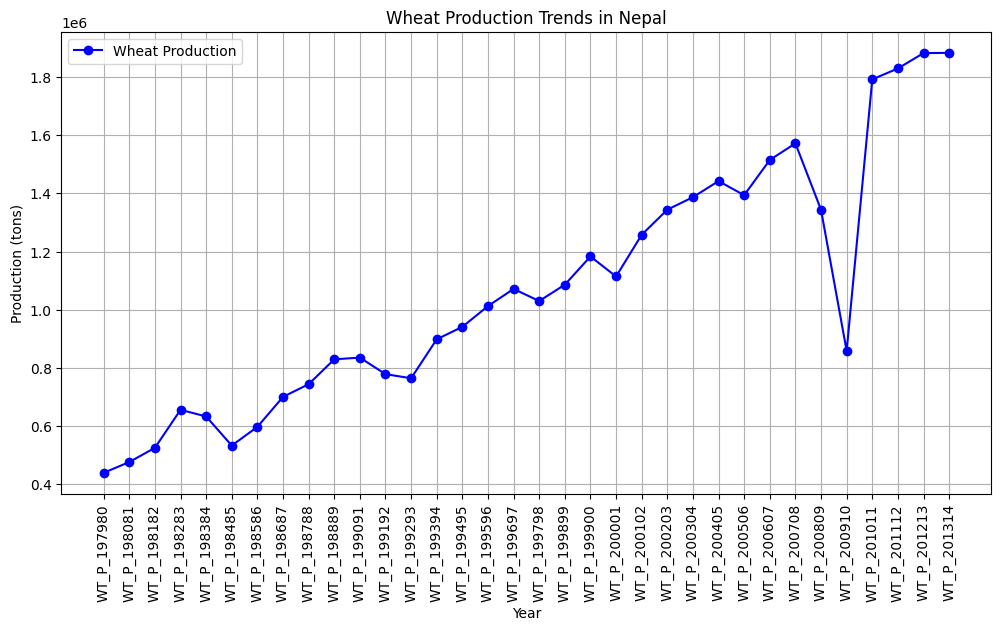

In [20]:
# Filter wheat production columns
wheat_cols = [col for col in df.columns if "WT_P_" in col]

# Sum wheat production across all districts for each year
wheat_trends = df[wheat_cols].sum()

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(wheat_cols, wheat_trends, marker="o", linestyle="-", color="b", label="Wheat Production")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.title("Wheat Production Trends in Nepal")
plt.legend()
plt.grid()
plt.savefig('wheat_production_trends.png')
plt.show()

In [10]:
df_sorted = df.sort_values(by="WT_P_201314", ascending=False)
top_10 = df_sorted[["DISTRICT_NAME", "WT_P_201314"]].head(10)

print(top_10)


   DISTRICT_NAME  WT_P_201314
43     Rupandehi       106750
19       Dhanusa       105000
31          Bara        93600
46    Kapilbastu        89900
32         Parsa        80680
65       Bardiya        72500
74    Kanchanpur        71000
70       Kailali        70000
21       Sarlahi        63750
20     Mahottari        62312


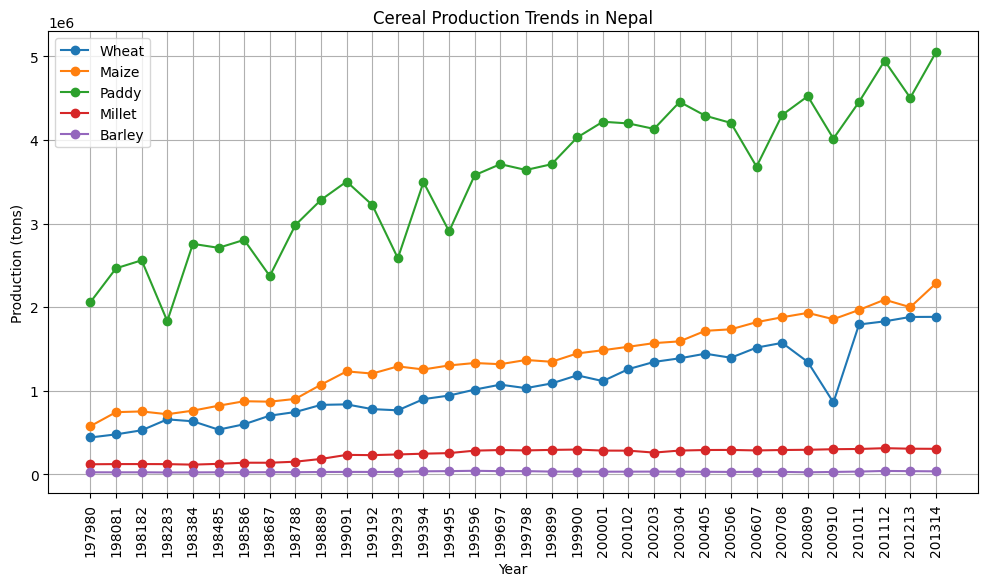

In [19]:
import matplotlib.pyplot as plt  

# Extract years and total production of major cereals  
years = [col.split("_")[-1] for col in df.columns if "WT_P_" in col]
wheat_production = df[[col for col in df.columns if "WT_P_" in col]].sum()
maize_production = df[[col for col in df.columns if "MZ_P_" in col]].sum()
paddy_production = df[[col for col in df.columns if "PD_P_" in col]].sum()
millet_production = df[[col for col in df.columns if "ML_P_" in col]].sum()
barley_production = df[[col for col in df.columns if "BL_P_" in col]].sum()


plt.figure(figsize=(12, 6))
plt.plot(years, wheat_production, marker="o", label="Wheat")
plt.plot(years, maize_production, marker="o", label="Maize")
plt.plot(years, paddy_production, marker ="o", label = "Paddy")
plt.plot(years, millet_production, marker = "o", label = "Millet")
plt.plot(years, barley_production, marker = "o", label = "Barley")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.title("Cereal Production Trends in Nepal")
plt.legend()
plt.grid()
plt.savefig('cereal_production_trends.png')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_28420\2666161620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="WT_P_" + year, y="DISTRICT_NAME", data=top_10, palette="viridis")


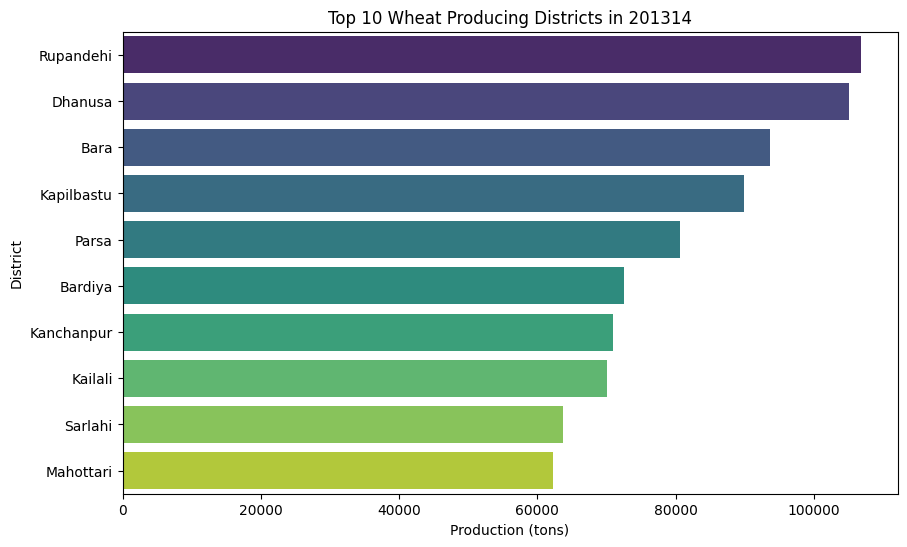

In [25]:
import seaborn as sns  

year = "201314"
top_10 = df.sort_values(f"WT_P_{year}", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="WT_P_" + year, y="DISTRICT_NAME", data=top_10, palette="viridis")
plt.xlabel("Production (tons)")
plt.ylabel("District")
plt.title(f"Top 10 Wheat Producing Districts in {year}")
plt.savefig('top_10_wheat_producing_districts.png')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28420\2058712292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PD_P_" + year, y="DISTRICT_NAME", data=top_10, palette="viridis")


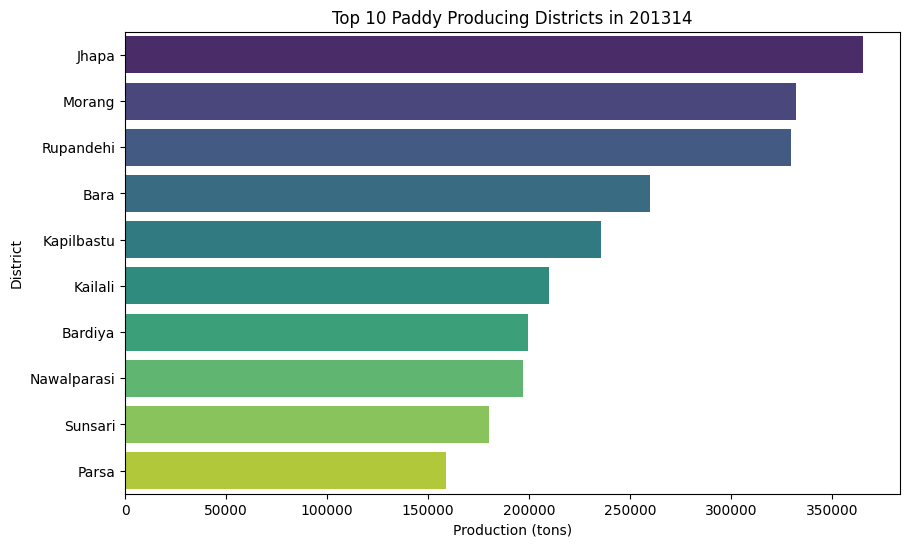

In [22]:
import seaborn as sns  

year = "201314"
top_10 = df.sort_values(f"PD_P_{year}", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="PD_P_" + year, y="DISTRICT_NAME", data=top_10, palette="viridis")
plt.xlabel("Production (tons)")
plt.ylabel("District")
plt.title(f"Top 10 Paddy Producing Districts in {year}")
plt.savefig('top_10_paddy_producing_districts.png')
plt.show()

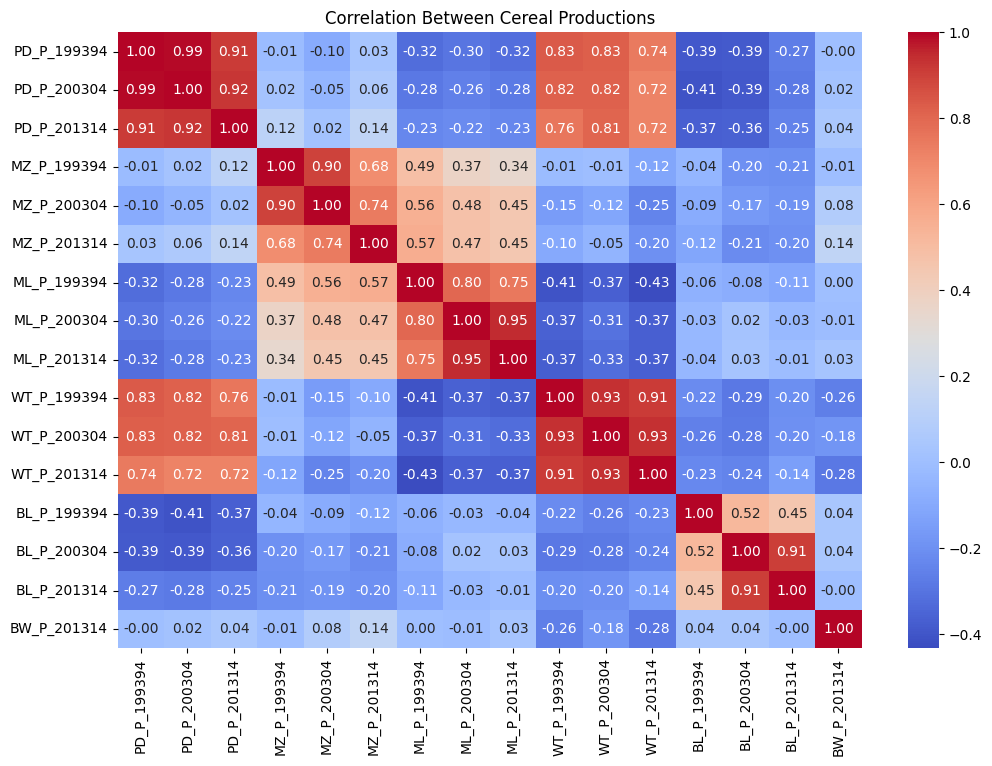

In [23]:
selected_years = ["199394", "200304", "201314"]  
crop_columns = [col for col in df.columns if any(y in col for y in selected_years) and "_P_" in col]

corr_matrix = df[crop_columns].corr()  

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cereal Productions")
plt.savefig('correlation_between_cereal_productions.png')
plt.show()

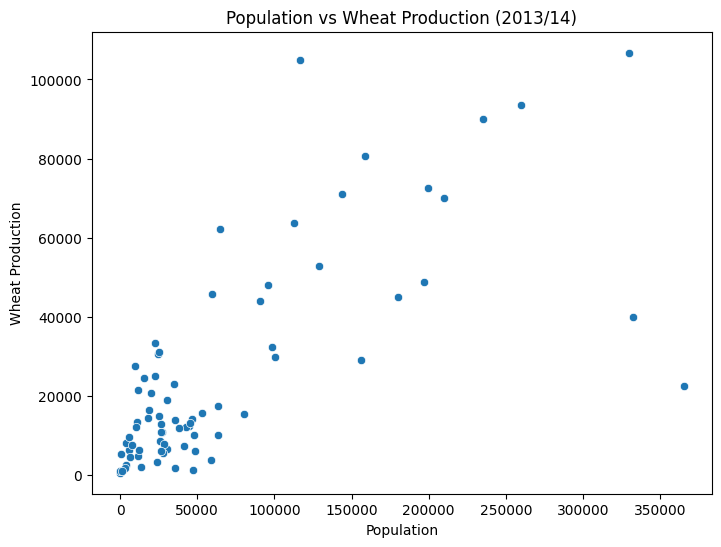

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PD_P_201314"], y=df["WT_P_201314"])
plt.xlabel("Population")
plt.ylabel("Wheat Production")
plt.title("Population vs Wheat Production (2013/14)")
plt.savefig('population_vs_wheat_production.png')
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Extract wheat production and years
wheat_columns = [col for col in df.columns if "WT_P_" in col]

years = []
for col in wheat_columns:
    year_str = col.split("_")[-1]
    
    try:
        year = int(year_str)
        if year < 100:  # Handle two-digit years like "80" -> "1980"
            year += 1900 if year >= 50 else 2000
        years.append(year)
    except ValueError:
        print(f"Skipping column: {col}")  # Debugging step for incorrect column names

# Convert years list to a NumPy array and ensure correct sorting
years = np.array(years)
years.sort()  # Ensure chronological order

wheat_production_series = df[wheat_columns].sum()  # Sum across districts

# Convert to Pandas Series with a proper DateTime index
wheat_production_series.index = pd.to_datetime(years, format="%Y")

# Fit ARIMA model
model = ARIMA(wheat_production_series, order=(1, 1, 1))
model_fit = model.fit()

# Predict next 5 years
future_years = [years[-1] + i for i in range(1, 6)]
forecast = model_fit.forecast(steps=5)

# Convert index of forecast to years
forecast.index = pd.to_datetime(future_years, format="%Y")

# Print Forecast
print(forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(wheat_production_series, label="Historical Data", marker="o")
plt.plot(forecast, label="Forecast", linestyle="dashed", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Wheat Production")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

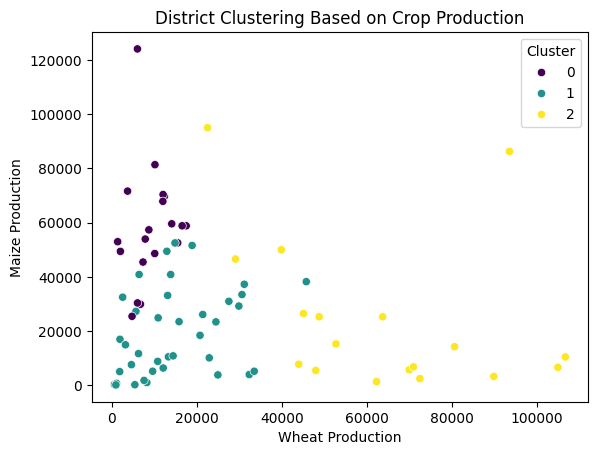

In [ ]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with the number of physical cores

from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  

# Select crop production columns  
crop_data = df[[col for col in df.columns if "_P_201314" in col]]  
scaler = StandardScaler()  
crop_scaled = scaler.fit_transform(crop_data)  

# Fit K-Means model  
kmeans = KMeans(n_clusters=3, random_state=42)  
df["Cluster"] = kmeans.fit_predict(crop_scaled)  

# Visualize clusters  
sns.scatterplot(x=df["WT_P_201314"], y=df["MZ_P_201314"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Wheat Production")
plt.ylabel("Maize Production")
plt.title("District Clustering Based on Crop Production")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

# Select features and target  
X = df[["PD_P_201314", "WT_P_201213"]]  
y = df["WT_P_201314"]  

# Train-test split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model  
model = LinearRegression()  
model.fit(X_train, y_train)  

# extract coefficients
coefficients = model.coef_

# Predict  
y_pred = model.predict(X_test)  
print("Model Coefficients:", model.coef_)


Model Coefficients: [0.00982048 0.99469209]


In [ ]:
from sklearn.metrics import r2_score

rmse = np.sqrt(2909633.40)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RMSE: 1705.7647551758125
R-squared Score: 0.9894687676249799


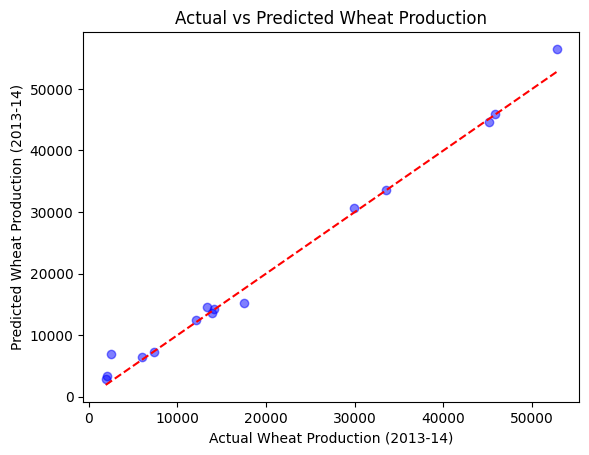

In [ ]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # 45-degree line
plt.xlabel("Actual Wheat Production (2013-14)")
plt.ylabel("Predicted Wheat Production (2013-14)")
plt.title("Actual vs Predicted Wheat Production")
plt.show()

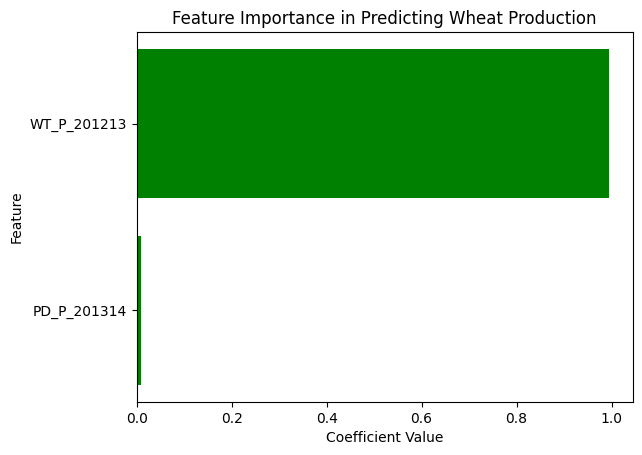

In [ ]:

features = ["PD_P_201314", "WT_P_201213"]

plt.barh(features, coefficients, color="green")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Wheat Production")
plt.show()